# Pengenalan

### Latar Belakang
Setiap selesai pelatihan peserta diminta mengisikan feedback salah satunya terkait Umpan Balik Materi serta Customer Satiscfaction

### Tujuan
Prediksi Umpan Balik Peserta Pelatihan terkait Materi pada Customer Satisfaction

### Data 
Data yang digunakan adalah data pelatihan Telkom Corporate University selama 2020

# Data Loading & Exploratory Data

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
mpl.style.use(['ggplot'])

%matplotlib inline

# reading csv data
feedback_Lat = pd.read_excel('dataset/Feedback_Lat3_2020.xlsx')

In [2]:
feedback_Lat.head(10)

,Nama Pelatihan,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,...,JML Peserta Hadir,JML UBPP Inst,JML UBPP Delivery,UBPP Penyelenggaraan,UBPP Materi,Net Promotor Score,Customer Satisfaction,Customer Satisfaction Category,First Response & Average Handling,Customer Effort Score
0,Exam AWS Cloud Practitioner Essentials 1,80114054,LAT,Test Online,Bandung,Learning Area 3 Bandung,DSP,Telkom Corporate University,Internal,Public,...,1,0,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0
1,Exam AWS Cloud Practitioner Essentials 3,80114058,LAT,Test Online,Bandung,Learning Area 3 / LO Bandung,DSP,Telkom Corporate University,Internal,Public,...,1,0,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0
2,Certified Product Manager,80113434,LAT,Test Online,Makassar,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Public,...,1,1,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0
3,Sequence Models,80113230,LAT,Seminar,Makassar,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Public,...,1,1,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0
4,Go From Zero to Hero in Python 3,80112311,LAT,Test Online,Bandung,Learning Area 3 / LO,DSP,Online (Lokasi Masing-Masing),External,Public,...,1,0,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0
5,The Complete Node.js Developer Course,80112312,LAT,Test Online,Bandung,Learning Area 3 / LO,DSP,Online (Lokasi Masing-Masing),External,Public,...,1,1,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0
6,Node.js API Masterclass Express MongoDB,80112313,LAT,Test Online,Bandung,Learning Area 3 / LO,DSP,Online (Lokasi Masing-Masing),External,Public,...,1,1,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0
7,Galera Cluster and MariaDB MySQL Replica,80112389,LAT,Test Online,Bandung,Learning Area 3 / LO,DSP,Online (Lokasi Masing-Masing),External,Public,...,1,0,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0
8,Node with React: Fullstack Web Dev,80112394,LAT,Test Online,Bandung,Learning Area 3 / LO,DSP,Online (Lokasi Masing-Masing),External,Public,...,1,1,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0
9,Learn Perl 5 By Doing It,80112395,LAT,Test Online,Bandung,Learning Area 3 / LO,DSP,Online (Lokasi Masing-Masing),External,Public,...,1,1,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0


In [3]:
feedback_Lat['Tgl Mulai'] = pd.to_datetime(feedback_Lat['Tgl Mulai'])

In [4]:
feedback_Lat['Bulan'] = feedback_Lat['Tgl Mulai'].dt.month

In [9]:
df_data = pd.DataFrame(feedback_Lat)
df_data.drop(['Nama Pelatihan', 'Objid Pelatihan', 'Category', 'Tipe', 'Lokasi Pelatihan', 'Provider', 'Academy Event', 'Location', 'Provider Category', 'Event Type', 'Status', 'Tgl Mulai', 'Tgl Selesai', 'JML Peserta', 'JML Confirmed', 'JML Peserta Hadir', 'JML UBPP Inst', 'JML UBPP Delivery', 'UBPP Penyelenggaraan',  'Net Promotor Score', 'First Response & Average Handling', 'Customer Effort Score'], axis=1, inplace=True)
df_data.dropna(inplace=True)
df_data

,UBPP Materi,Customer Satisfaction,Customer Satisfaction Category,Bulan
0,100.00,100.00,Satisfaction Tinggi,12
1,100.00,100.00,Satisfaction Tinggi,11
2,100.00,100.00,Satisfaction Tinggi,9
3,100.00,100.00,Satisfaction Tinggi,8
4,100.00,100.00,Satisfaction Tinggi,4
...,...,...,...,...
930,65.42,66.11,Satisfaction Rendah,10
931,47.50,36.67,Satisfaction Rendah,10
932,40.00,34.00,Satisfaction Rendah,8
933,35.00,30.00,Satisfaction Rendah,8


In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 0 to 934
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   UBPP Materi                     935 non-null    float64
 1   Customer Satisfaction           935 non-null    float64
 2   Customer Satisfaction Category  935 non-null    object 
 3   Bulan                           935 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 36.5+ KB


# Model Definition & Training

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pickle

In [57]:
list(df_data.columns)

['UBPP Materi',
 'Customer Satisfaction',
 'Customer Satisfaction Category',
 'Bulan']

In [58]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(df_data[['UBPP Materi']], df_data[['Customer Satisfaction Category']], test_size=0.2, random_state=0)

(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((748, 1), (187, 1), (748, 1), (187, 1))

In [59]:
#KNN

(df_data[['UBPP Materi']].shape, df_data[['Customer Satisfaction Category']].shape)
#Split Data
knn_x_train, knn_x_test, knn_y_train, knn_y_test = train_test_split(df_data[['UBPP Materi']], df_data['Customer Satisfaction Category'], test_size=0.2, random_state=0)
(knn_x_train.shape, knn_x_test.shape, knn_y_train.shape, knn_y_test.shape)

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(knn_x_train, knn_y_train)

#Predict the response for test dataset
y_pred_knn = knn.predict(knn_x_test)

# Akurasi Model
metrics.accuracy_score(y_pred_knn, knn_y_test)

0.8342245989304813

In [60]:
#SVM

(df_data[['UBPP Materi']].shape, df_data[['Customer Satisfaction Category']].shape)
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(df_data[['UBPP Materi']], df_data['Customer Satisfaction Category'], test_size=0.2, random_state=0)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train_svm, y_train_svm) 

#Predict the response for test dataset
y_pred_svm = clf.predict(x_test_svm)

# Model Accuracy: how often is the classifier correct?
print("Accuracy SVM:", accuracy_score(y_test_svm, y_pred_svm))

Accuracy SVM: 0.8449197860962567


In [43]:
#Decision tree

x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(df_data[['UBPP Materi']], df_data['Customer Satisfaction Category'], test_size=0.2, random_state=0)
# Create Decision Tree classifer object
dct = DecisionTreeClassifier()

# Train Decision Tree Classifer
dct = dct.fit(x_train_dt,y_train_dt)

#Predict the response for test dataset
y_pred = dct.predict(x_test_dt)

# Model Accuracy, how often is the classifier correct?
print("Accuracy Decision Tree:",metrics.accuracy_score(y_test, y_pred))

Accuracy Decision Tree: 0.8181818181818182


In [61]:
#Random Forest

x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(df_data[['UBPP Materi']], df_data['Customer Satisfaction Category'], test_size=0.2, random_state=0)
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
 
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)
 
#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(x_train_rf, y_train_rf) 

y_pred_rfc=rfc.predict(x_test_rf)

print("Accuracy Random Forest:",metrics.accuracy_score(y_test_rf, y_pred_rfc))

Accuracy Random Forest: 0.8181818181818182


In [62]:
#Naive Bayes

x_train_nbc, x_test_nbc, y_train_nbc, y_test_nbc = train_test_split(df_data[['UBPP Materi']], df_data['Customer Satisfaction Category'], test_size=0.2, random_state=0)
(x_train_nbc.shape, x_test_nbc.shape, y_train_nbc.shape, y_test_nbc.shape)

from sklearn.naive_bayes import GaussianNB 
nbc=GaussianNB()
nbc.fit(x_train_nbc, y_train_nbc)
(x_train_nbc.shape, y_train_nbc.shape)
y_pred_nbc = nbc.predict(x_test_nbc)

print("Accuracy Naive Bayes:",metrics.accuracy_score(y_test_nbc, y_pred_nbc))

Accuracy Naive Bayes: 0.8449197860962567


# Model Evaluation

Text(0, 0.5, 'Error mean')

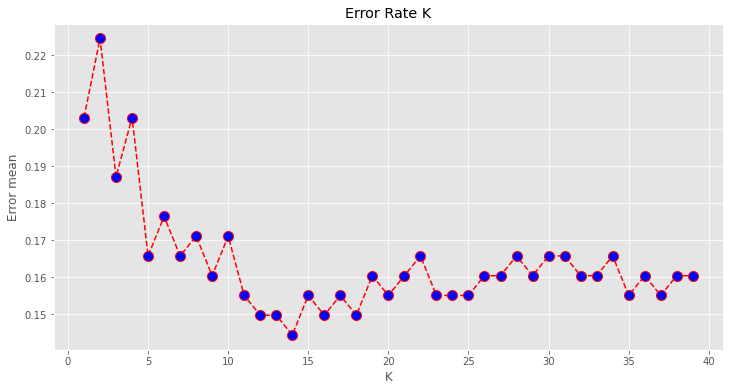

In [63]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(knn_x_train, knn_y_train)
    pred_i = knn.predict(knn_x_test)
    error.append(np.mean(pred_i != knn_y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

# Export Model

In [67]:
pickle.dump(nbc, open('model classifier.pkl', 'wb'))

In [69]:
y_pred_nbc

array(['Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Rendah',
       'Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Rendah',
       'Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Tinggi',
       'Satisfaction Tinggi', 'Satisfaction Re